# 01a01 Graph Toy Datasets
> Interesting Adjacency Matrices for test embeddings

In [ ]:
# default_exp graph_datasets
from nbdev.showdoc import *
import numpy as np
import torch
%load_ext autoreload
%autoreload 2

FRED is, at heart, an embedder of directed graphs. But what types of graphs? This notebook, and those nested under 01a01, contain a battery of toy directed graphs, including:
1. (Directed) Stochastic Block Models
2. Trees

This notebook houses a sampling of these graphs, with details on how to call them and visualize them.

In [ ]:
# hide
from FRED.graph_datasets import (
    display_heatmap_galary, display_graph_galary,
    EmailEuNetwork, SourceSink, SmallRandom,
    ChainGraph, HalfChainGraph, CycleGraph, HalfCycleGraph,
    DirectedStochasticBlockModel, source_graph, sink_graph
)

Processing...
Done!


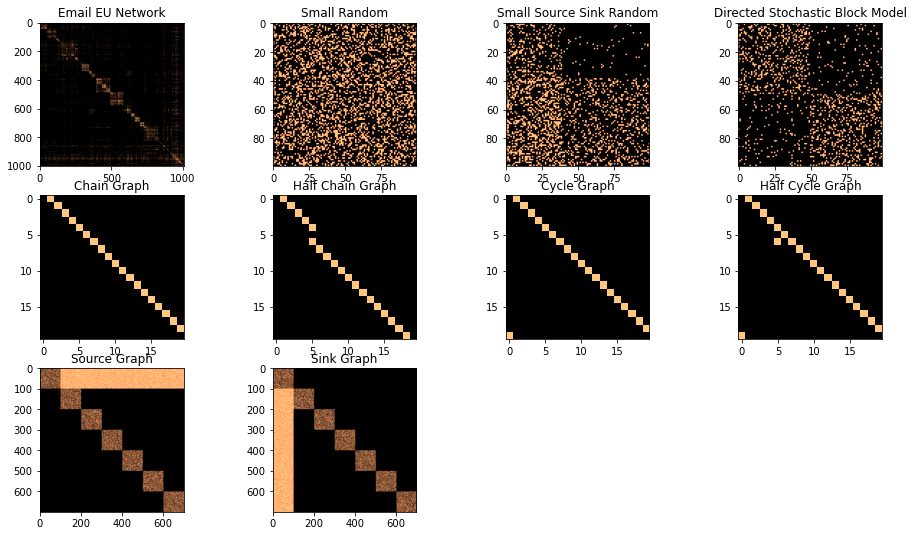

In [ ]:
# hide_input
dataset = [
    ("Email EU Network"                 , EmailEuNetwork()[0]),
    ("Small Random"                     , SmallRandom(num_nodes=100, prob_edge=0.3)[0]),
    ("Small Source Sink Random"         , SmallRandom(num_nodes=100, prob_edge=0.2, 
                                            pre_transform=SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
                                        )[0]),
    ("Directed Stochastic Block Model"  , DirectedStochasticBlockModel(num_nodes=100, num_clusters=2, 
                                            aij=np.array([[0.4, 0.1], [0.1, 0.4]]), 
                                            bij=np.array([[0.5, 0.5], [0.5, 0.5]])
                                        )[0]),
    ("Chain Graph"                      , ChainGraph(num_nodes=20)[0]),
    ("Half Chain Graph"                 , HalfChainGraph(num_nodes=20, center=5)[0]),
    ("Cycle Graph"                      , CycleGraph(num_nodes=20)[0]),
    ("Half Cycle Graph"                 , HalfCycleGraph(num_nodes=20, center=5)[0]),
    ("Source Graph"                     , source_graph()[0]),
    ("Sink Graph"                       , sink_graph()[0])
]
display_heatmap_galary(dataset, ncol=4)

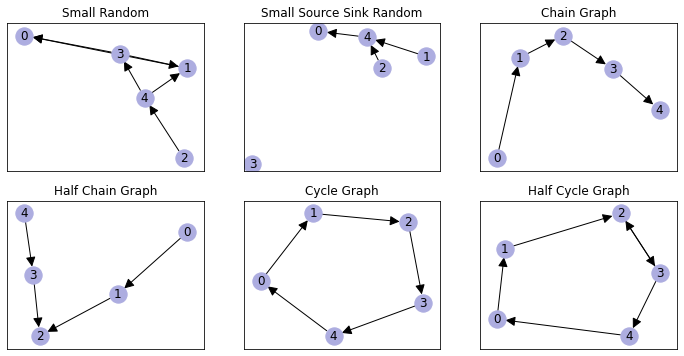

In [ ]:
# hide_input
dataset = [
    ("Small Random"                     , SmallRandom(num_nodes=5, prob_edge=0.3)[0]),
    ("Small Source Sink Random"         , SmallRandom(num_nodes=5, prob_edge=0.2, 
                                            pre_transform=SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
                                        )[0]),
    ("Chain Graph"                      , ChainGraph(num_nodes=5)[0]),
    ("Half Chain Graph"                 , HalfChainGraph(num_nodes=5, center=2)[0]),
    ("Cycle Graph"                      , CycleGraph(num_nodes=5)[0]),
    ("Half Cycle Graph"                 , HalfCycleGraph(num_nodes=5, center=2)[0]),
]
display_graph_galary(dataset, ncol=3)

In [ ]:
# hide_input
func_set = [
    EmailEuNetwork, SourceSink, SmallRandom,
    ChainGraph, HalfChainGraph, CycleGraph, HalfCycleGraph,
    DirectedStochasticBlockModel, source_graph, sink_graph
]
for func in func_set:
    show_doc(func)

<h2 id="EmailEuNetwork" class="doc_header"><code>class</code> <code>EmailEuNetwork</code><a href="https://github.com/professorwug/FRED/tree/master/FRED/graph_datasets.py#L14" class="source_link" style="float:right">[source]</a></h2>

> <code>EmailEuNetwork</code>(**`transform`**=*`None`*, **`pre_transform`**=*`None`*) :: `InMemoryDataset`

email-Eu-core network from Stanford Large Network Dataset Collection

The network was generated from the email exchanges within a large European research institution.
Each node represents an individual, and a directional edge from one individual to another represents some email exchanges between them in the specified direction.
Each individual belongs to exactly one of 42 departments in the institution.

<h2 id="SourceSink" class="doc_header"><code>class</code> <code>SourceSink</code><a href="https://github.com/professorwug/FRED/tree/master/FRED/graph_datasets.py#L71" class="source_link" style="float:right">[source]</a></h2>

> <code>SourceSink</code>(**`prob_source`**=*`0.1`*, **`prob_sink`**=*`0.1`*, **`adv_prob`**=*`0`*, **`remove_prob`**=*`0`*) :: `BaseTransform`

Transform a (directed or undirected) graph into a directed graph
with a proportion of the nodes with mostly out-edges
and a porportion of the nodes with mostly in-edges

Parameters
----------
prob_source : float
    must be between 0 and 1
    Proportion of nodes/communities to turn into source nodes/communities
    (with mostly out-edges)
prob_sink : float
    must be between 0 and 1
    prob_source and prob_sink must add up to no more than 1
    Proportion of nodes/communities to turn into sink nodes/communities
    (with mostly in-edges)
adv_prob : float
    must be between 0 and 1
    Probability of in-edges for source nodes and/or out-edges for sink nodes
remove_prob : float
    must be between 0 and 1
    Probability of removing an in-edge for source nodes and/or out-edges for sink nodes
    1 - remove_prob is the probability of reversing the direction of in-edge for source nodes and/or out-edges for sink nodes

<h2 id="SmallRandom" class="doc_header"><code>class</code> <code>SmallRandom</code><a href="https://github.com/professorwug/FRED/tree/master/FRED/graph_datasets.py#L196" class="source_link" style="float:right">[source]</a></h2>

> <code>SmallRandom</code>(**`num_nodes`**=*`5`*, **`prob_edge`**=*`0.2`*, **`transform`**=*`None`*, **`pre_transform`**=*`None`*) :: `InMemoryDataset`

Dataset base class for creating graph datasets which easily fit
into CPU memory.
Inherits from :class:`torch_geometric.data.Dataset`.
See `here <https://pytorch-geometric.readthedocs.io/en/latest/notes/
create_dataset.html#creating-in-memory-datasets>`__ for the accompanying
tutorial.

Args:
    root (string, optional): Root directory where the dataset should be
        saved. (default: :obj:`None`)
    transform (callable, optional): A function/transform that takes in an
        :obj:`torch_geometric.data.Data` object and returns a transformed
        version. The data object will be transformed before every access.
        (default: :obj:`None`)
    pre_transform (callable, optional): A function/transform that takes in
        an :obj:`torch_geometric.data.Data` object and returns a
        transformed version. The data object will be transformed before
        being saved to disk. (default: :obj:`None`)
    pre_filter (callable, optional): A function that takes in an
        :obj:`torch_geometric.data.Data` object and returns a boolean
        value, indicating whether the data object should be included in the
        final dataset. (default: :obj:`None`)

<h2 id="ChainGraph" class="doc_header"><code>class</code> <code>ChainGraph</code><a href="https://github.com/professorwug/FRED/tree/master/FRED/graph_datasets.py#L218" class="source_link" style="float:right">[source]</a></h2>

> <code>ChainGraph</code>(**`num_nodes`**=*`2`*, **`transform`**=*`None`*) :: `InMemoryDataset`

Dataset base class for creating graph datasets which easily fit
into CPU memory.
Inherits from :class:`torch_geometric.data.Dataset`.
See `here <https://pytorch-geometric.readthedocs.io/en/latest/notes/
create_dataset.html#creating-in-memory-datasets>`__ for the accompanying
tutorial.

Args:
    root (string, optional): Root directory where the dataset should be
        saved. (default: :obj:`None`)
    transform (callable, optional): A function/transform that takes in an
        :obj:`torch_geometric.data.Data` object and returns a transformed
        version. The data object will be transformed before every access.
        (default: :obj:`None`)
    pre_transform (callable, optional): A function/transform that takes in
        an :obj:`torch_geometric.data.Data` object and returns a
        transformed version. The data object will be transformed before
        being saved to disk. (default: :obj:`None`)
    pre_filter (callable, optional): A function that takes in an
        :obj:`torch_geometric.data.Data` object and returns a boolean
        value, indicating whether the data object should be included in the
        final dataset. (default: :obj:`None`)

<h2 id="HalfChainGraph" class="doc_header"><code>class</code> <code>HalfChainGraph</code><a href="https://github.com/professorwug/FRED/tree/master/FRED/graph_datasets.py#L231" class="source_link" style="float:right">[source]</a></h2>

> <code>HalfChainGraph</code>(**`num_nodes`**=*`3`*, **`center`**=*`1`*, **`transform`**=*`None`*) :: `InMemoryDataset`

Dataset base class for creating graph datasets which easily fit
into CPU memory.
Inherits from :class:`torch_geometric.data.Dataset`.
See `here <https://pytorch-geometric.readthedocs.io/en/latest/notes/
create_dataset.html#creating-in-memory-datasets>`__ for the accompanying
tutorial.

Args:
    root (string, optional): Root directory where the dataset should be
        saved. (default: :obj:`None`)
    transform (callable, optional): A function/transform that takes in an
        :obj:`torch_geometric.data.Data` object and returns a transformed
        version. The data object will be transformed before every access.
        (default: :obj:`None`)
    pre_transform (callable, optional): A function/transform that takes in
        an :obj:`torch_geometric.data.Data` object and returns a
        transformed version. The data object will be transformed before
        being saved to disk. (default: :obj:`None`)
    pre_filter (callable, optional): A function that takes in an
        :obj:`torch_geometric.data.Data` object and returns a boolean
        value, indicating whether the data object should be included in the
        final dataset. (default: :obj:`None`)

<h2 id="CycleGraph" class="doc_header"><code>class</code> <code>CycleGraph</code><a href="https://github.com/professorwug/FRED/tree/master/FRED/graph_datasets.py#L247" class="source_link" style="float:right">[source]</a></h2>

> <code>CycleGraph</code>(**`num_nodes`**=*`3`*, **`transform`**=*`None`*) :: `InMemoryDataset`

Dataset base class for creating graph datasets which easily fit
into CPU memory.
Inherits from :class:`torch_geometric.data.Dataset`.
See `here <https://pytorch-geometric.readthedocs.io/en/latest/notes/
create_dataset.html#creating-in-memory-datasets>`__ for the accompanying
tutorial.

Args:
    root (string, optional): Root directory where the dataset should be
        saved. (default: :obj:`None`)
    transform (callable, optional): A function/transform that takes in an
        :obj:`torch_geometric.data.Data` object and returns a transformed
        version. The data object will be transformed before every access.
        (default: :obj:`None`)
    pre_transform (callable, optional): A function/transform that takes in
        an :obj:`torch_geometric.data.Data` object and returns a
        transformed version. The data object will be transformed before
        being saved to disk. (default: :obj:`None`)
    pre_filter (callable, optional): A function that takes in an
        :obj:`torch_geometric.data.Data` object and returns a boolean
        value, indicating whether the data object should be included in the
        final dataset. (default: :obj:`None`)

<h2 id="HalfCycleGraph" class="doc_header"><code>class</code> <code>HalfCycleGraph</code><a href="https://github.com/professorwug/FRED/tree/master/FRED/graph_datasets.py#L261" class="source_link" style="float:right">[source]</a></h2>

> <code>HalfCycleGraph</code>(**`num_nodes`**=*`3`*, **`center`**=*`0`*, **`transform`**=*`None`*) :: `InMemoryDataset`

Dataset base class for creating graph datasets which easily fit
into CPU memory.
Inherits from :class:`torch_geometric.data.Dataset`.
See `here <https://pytorch-geometric.readthedocs.io/en/latest/notes/
create_dataset.html#creating-in-memory-datasets>`__ for the accompanying
tutorial.

Args:
    root (string, optional): Root directory where the dataset should be
        saved. (default: :obj:`None`)
    transform (callable, optional): A function/transform that takes in an
        :obj:`torch_geometric.data.Data` object and returns a transformed
        version. The data object will be transformed before every access.
        (default: :obj:`None`)
    pre_transform (callable, optional): A function/transform that takes in
        an :obj:`torch_geometric.data.Data` object and returns a
        transformed version. The data object will be transformed before
        being saved to disk. (default: :obj:`None`)
    pre_filter (callable, optional): A function that takes in an
        :obj:`torch_geometric.data.Data` object and returns a boolean
        value, indicating whether the data object should be included in the
        final dataset. (default: :obj:`None`)

<h2 id="DirectedStochasticBlockModel" class="doc_header"><code>class</code> <code>DirectedStochasticBlockModel</code><a href="https://github.com/professorwug/FRED/tree/master/FRED/graph_datasets.py#L283" class="source_link" style="float:right">[source]</a></h2>

> <code>DirectedStochasticBlockModel</code>(**`num_nodes`**, **`num_clusters`**, **`aij`**, **`bij`**, **`transform`**=*`None`*) :: `InMemoryDataset`

Dataset base class for creating graph datasets which easily fit
into CPU memory.
Inherits from :class:`torch_geometric.data.Dataset`.
See `here <https://pytorch-geometric.readthedocs.io/en/latest/notes/
create_dataset.html#creating-in-memory-datasets>`__ for the accompanying
tutorial.

Args:
    root (string, optional): Root directory where the dataset should be
        saved. (default: :obj:`None`)
    transform (callable, optional): A function/transform that takes in an
        :obj:`torch_geometric.data.Data` object and returns a transformed
        version. The data object will be transformed before every access.
        (default: :obj:`None`)
    pre_transform (callable, optional): A function/transform that takes in
        an :obj:`torch_geometric.data.Data` object and returns a
        transformed version. The data object will be transformed before
        being saved to disk. (default: :obj:`None`)
    pre_filter (callable, optional): A function that takes in an
        :obj:`torch_geometric.data.Data` object and returns a boolean
        value, indicating whether the data object should be included in the
        final dataset. (default: :obj:`None`)

<h4 id="source_graph" class="doc_header"><code>source_graph</code><a href="https://github.com/professorwug/FRED/tree/master/FRED/graph_datasets.py#L336" class="source_link" style="float:right">[source]</a></h4>

> <code>source_graph</code>(**`n_points`**=*`700`*, **`num_clusters`**=*`7`*)



<h4 id="sink_graph" class="doc_header"><code>sink_graph</code><a href="https://github.com/professorwug/FRED/tree/master/FRED/graph_datasets.py#L352" class="source_link" style="float:right">[source]</a></h4>

> <code>sink_graph</code>(**`n_points`**=*`700`*, **`num_clusters`**=*`7`*)

